### References

**Book:**
- Deep Learning with Python, Second Edition
  - Book by François Chollet
  - François Chollet is a French software engineer and artificial intelligence researcher currently working at Google. Chollet is the creator of the Keras deep-learning library, released in 2015, and a main contributor to the TensorFlow machine learning framework.


### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. 

It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [2]:
# Loading IMDB data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
print(train_data[0:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. 

This allows us to work with vector data of manageable size. 

If we didn’t set this limit, we’d be working with 88,585 unique words in the training data, which is unnecessarily large. 

Many of these words only occur in a single sample, and thus can’t be meaningfully used for classification.

In [5]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
# We have used top 10000 most frequent words
max([max(sequence) for sequence in train_data])

9999

In [7]:
# Decoding reviews back to text

# word to index mapping dictionary
word_index = imdb.get_word_index()

# Five words and their indices
print(list(word_index.keys())[:5],"\n")
print(list(word_index.values())[:5],"\n")

# Crosschecking the word to index mapping
print(word_index.get("fawn"),"\n")

# creating a reverse dictionary => index to words 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Crosschecking the index to word mapping
print(reverse_word_index.get(34701),"\n")

# Decoding the first review
# indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print(decoded_review)

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani'] 

[34701, 52006, 52007, 16816, 63951] 

34701 

fawn 

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for th

**Preparing the data**

You can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data.

There are two ways:
1. Pad your lists so that they all have the same length `(samples, max_length)`, and start your model with a layer capable of handling such integer tensors (the Embedding layer)
2. Multi-hot encode your lists to turn them into vectors of 0s and 1s. Example: turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s.

In [8]:
# Multi hot encoding

def vectorize_sequences(sequences, dimension=10000):
    # Zeros tensor
    results = np.zeros((len(sequences), dimension))
    # Replacing ones
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
# Vectorizing the data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train.shape)
print(x_train[:2,:20])

(25000, 10000)
[[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]]


In [12]:
# Vectorizing labels

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [13]:
print(y_train.shape)
print(y_train[:10])

(25000,)
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [14]:
# Model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

In [15]:
# Compilation
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
# Separating validation data from training data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# Training

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


30/30 [==============================] - 3s 53ms/step - loss: 0.5981 - accuracy: 0.6831 - val_loss: 0.5341 - val_accuracy: 0.7214
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4410 - accuracy: 0.8622 - val_loss: 0.4086 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3275 - accuracy: 0.9091 - val_loss: 0.3283 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2513 - accuracy: 0.9273 - val_loss: 0.2942 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2018 - accuracy: 0.9394 - val_loss: 0.2805 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1705 - accuracy: 0.9477 - val_loss: 0.2847 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1432 - accuracy: 0.9584 - val_loss: 0.3128 - val_accuracy: 0.8784
Epoch 8/20


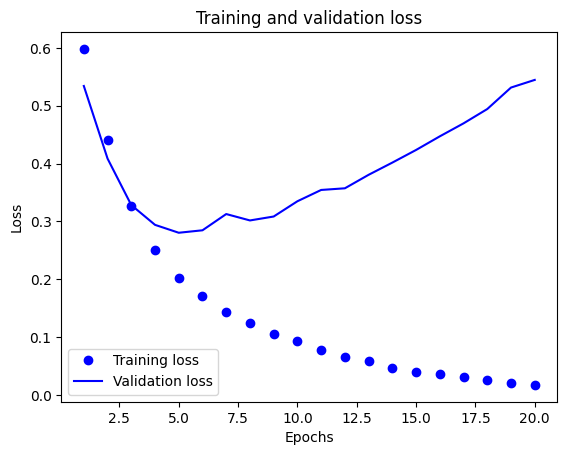

In [18]:
# Plotting the training and validation loss

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

# Blue dot
plt.plot(epochs, loss_values, "bo", label="Training loss")
# Blue solid
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

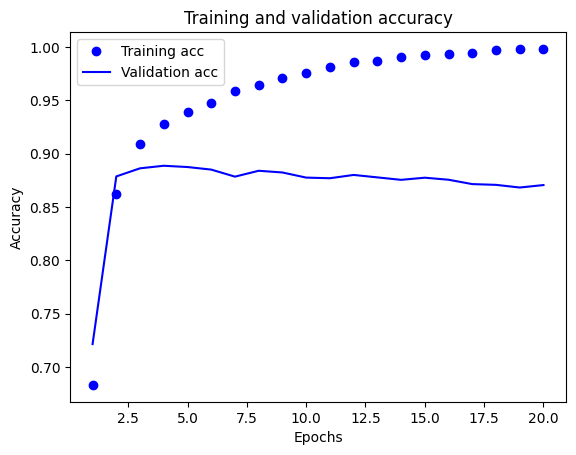

In [19]:
# Plotting the training and validation accuracy

# Clears the figure
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

# Blue dot
plt.plot(epochs, acc, "bo", label="Training acc")
# Blue solid
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before - **Overfitting**.

In [20]:
# Retraining the model from scratch for 4 epochs and evaluate on test data

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

print("\nEvaluation")
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4839 - accuracy: 0.8020
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2854 - accuracy: 0.8996
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2224 - accuracy: 0.9204
Epoch 4/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1889 - accuracy: 0.9320

Evaluation
782/782 [==============================] - 3s 3ms/step - loss: 0.2830 - accuracy: 0.8870


In [21]:
# Using a trained model to generate predictions on new data
# Let's assume we have separate new data for prediction - For now, we will use the test data

model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.22648902],
       [0.998392  ],
       [0.7572585 ],
       ...,
       [0.08564439],
       [0.05518745],
       [0.5920606 ]], dtype=float32)

You can generate the likelihood of reviews being positive by using the predict method.

As you can see, the model is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)